# Time Series
- Time series can be defined as a set of measurements of certain variable made at regular time intervals.
- Time acts as an independent variable for estimation.
- A time series defined by the values Y1, Y2 of a variable Y at time t1,t2,t3 is given by Y = F(t).

### Component of time series. 
- Trend.
- Seasonal.
- Cyclic.
- Irregular.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
import pandas as pd
data = pd.read_csv("AirPassengers.csv")
data.head(100)

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121
...,...,...
95,15-12-1956,306
96,15-01-1957,315
97,15-02-1957,301
98,15-03-1957,356


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
# First we need to set the month column as index of teh data frame. 
data = data.set_index("Month")
data.head()

,Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121


## Visualizing the time series data. 
- Check for trend, seasonality or random patterns.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: 'Axes' object has no attribute 'show'

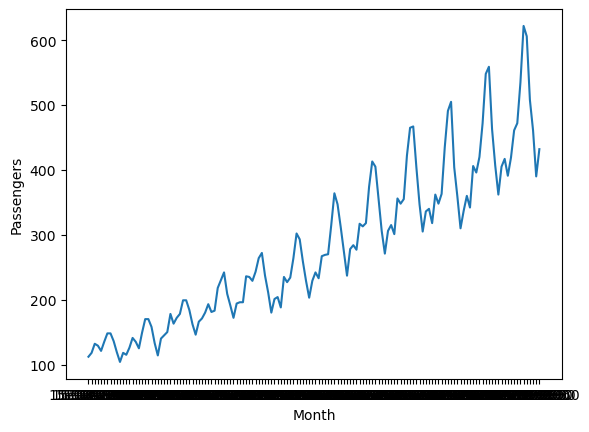

In [14]:
import seaborn as sns
sns.lineplot(x=data.index, y=data["Passengers"])
plt.show()

In the above graph observe 
- uptrande.
- seasonality. 

# Step 2: Check for Stationarity
## Method 1: Rolling Statistics

In [ ]:
#Determing rolling statistics
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()

#plot rolling statistics:
orig = plt.plot(data, color = "blue", label = "Original")
mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std = plt.plot(rolstd, color ="black", label = "Rolling Std")
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()

## Method 2: ADF Test

In [ ]:
# ADF est - null hypothesis - non-stationary - if p-value < 5% reject null hypothesis
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(data["Passengers"].values)
adfuller_result

In [ ]:
print("p-Value:{}".format(adfuller_result[1]))

- p high null fly. So the data is non statationary.

# Stationarize the time series.
## Differencing

In [ ]:
# Get the difference between the moving average and the actual number of passengers.
ts = data["Passengers"]

mv_diff = ts - ts.shift(1)
mv_diff.head()
#mv_diff.dropna()

In [ ]:
#transformation
ts_log = np.log(data["Passengers"])
ts_log